# Notes in Chapter 5

## 5.2

In [1]:
import torch

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).float()
t_u = torch.tensor(t_u).float()

## 5.3

In [3]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [7]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - 
    loss_fn(model(t_u, w - delta, b), t_c)) / (2 * delta)
loss_rate_of_change_w

tensor(4517.2974)

In [9]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w
w

tensor(-89.3459)

In [11]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - 
    loss_fn(model(t_u, w, b - delta), t_c)) / (2 * delta)
loss_rate_of_change_b

tensor(-9290.)

In [12]:
b = b - learning_rate * loss_rate_of_change_b
b

tensor(92.9000)

In [13]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [14]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [18]:
def train_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params -= learning_rate * grad

        print('Epoch: {}, Loss: {:.2f}'.format(epoch, loss.item()))
        print('\tParams: ', params)
        print('\tGrad: ', grad)

    return params 

In [20]:
train_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch: 1, Loss: 1763.88
	Params:  tensor([ 0.5483, -0.0083])
	Grad:  tensor([4517.2964,   82.6000])
Epoch: 2, Loss: 323.09
	Params:  tensor([ 0.3623, -0.0118])
	Grad:  tensor([1859.5493,   35.7843])
Epoch: 3, Loss: 78.93
	Params:  tensor([ 0.2858, -0.0135])
	Grad:  tensor([765.4666,  16.5122])
Epoch: 4, Loss: 37.55
	Params:  tensor([ 0.2543, -0.0143])
	Grad:  tensor([315.0790,   8.5787])
Epoch: 5, Loss: 30.54
	Params:  tensor([ 0.2413, -0.0149])
	Grad:  tensor([129.6733,   5.3127])
Epoch: 6, Loss: 29.35
	Params:  tensor([ 0.2360, -0.0153])
	Grad:  tensor([53.3495,  3.9682])
Epoch: 7, Loss: 29.15
	Params:  tensor([ 0.2338, -0.0156])
	Grad:  tensor([21.9304,  3.4148])
Epoch: 8, Loss: 29.11
	Params:  tensor([ 0.2329, -0.0159])
	Grad:  tensor([8.9964, 3.1869])
Epoch: 9, Loss: 29.11
	Params:  tensor([ 0.2325, -0.0162])
	Grad:  tensor([3.6721, 3.0930])
Epoch: 10, Loss: 29.11
	Params:  tensor([ 0.2324, -0.0166])
	Grad:  tensor([1.4803, 3.0544])
Epoch: 11, Loss: 29.10
	Params:  tensor([ 0.2323

tensor([ 0.2327, -0.0438])

In [24]:
t_un = 0.1 * t_u

params = train_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

.1366,  0.7733])
Epoch: 795, Loss: 4.74
	Params:  tensor([  4.5663, -12.7680])
	Grad:  tensor([-0.1364,  0.7720])
Epoch: 796, Loss: 4.73
	Params:  tensor([  4.5677, -12.7758])
	Grad:  tensor([-0.1361,  0.7707])
Epoch: 797, Loss: 4.72
	Params:  tensor([  4.5690, -12.7834])
	Grad:  tensor([-0.1359,  0.7694])
Epoch: 798, Loss: 4.72
	Params:  tensor([  4.5704, -12.7911])
	Grad:  tensor([-0.1357,  0.7681])
Epoch: 799, Loss: 4.71
	Params:  tensor([  4.5717, -12.7988])
	Grad:  tensor([-0.1354,  0.7668])
Epoch: 800, Loss: 4.71
	Params:  tensor([  4.5731, -12.8064])
	Grad:  tensor([-0.1352,  0.7655])
Epoch: 801, Loss: 4.70
	Params:  tensor([  4.5744, -12.8141])
	Grad:  tensor([-0.1350,  0.7642])
Epoch: 802, Loss: 4.69
	Params:  tensor([  4.5758, -12.8217])
	Grad:  tensor([-0.1347,  0.7629])
Epoch: 803, Loss: 4.69
	Params:  tensor([  4.5771, -12.8293])
	Grad:  tensor([-0.1345,  0.7616])
Epoch: 804, Loss: 4.68
	Params:  tensor([  4.5785, -12.8369])
	Grad:  tensor([-0.1343,  0.7603])
Epoch: 805, L

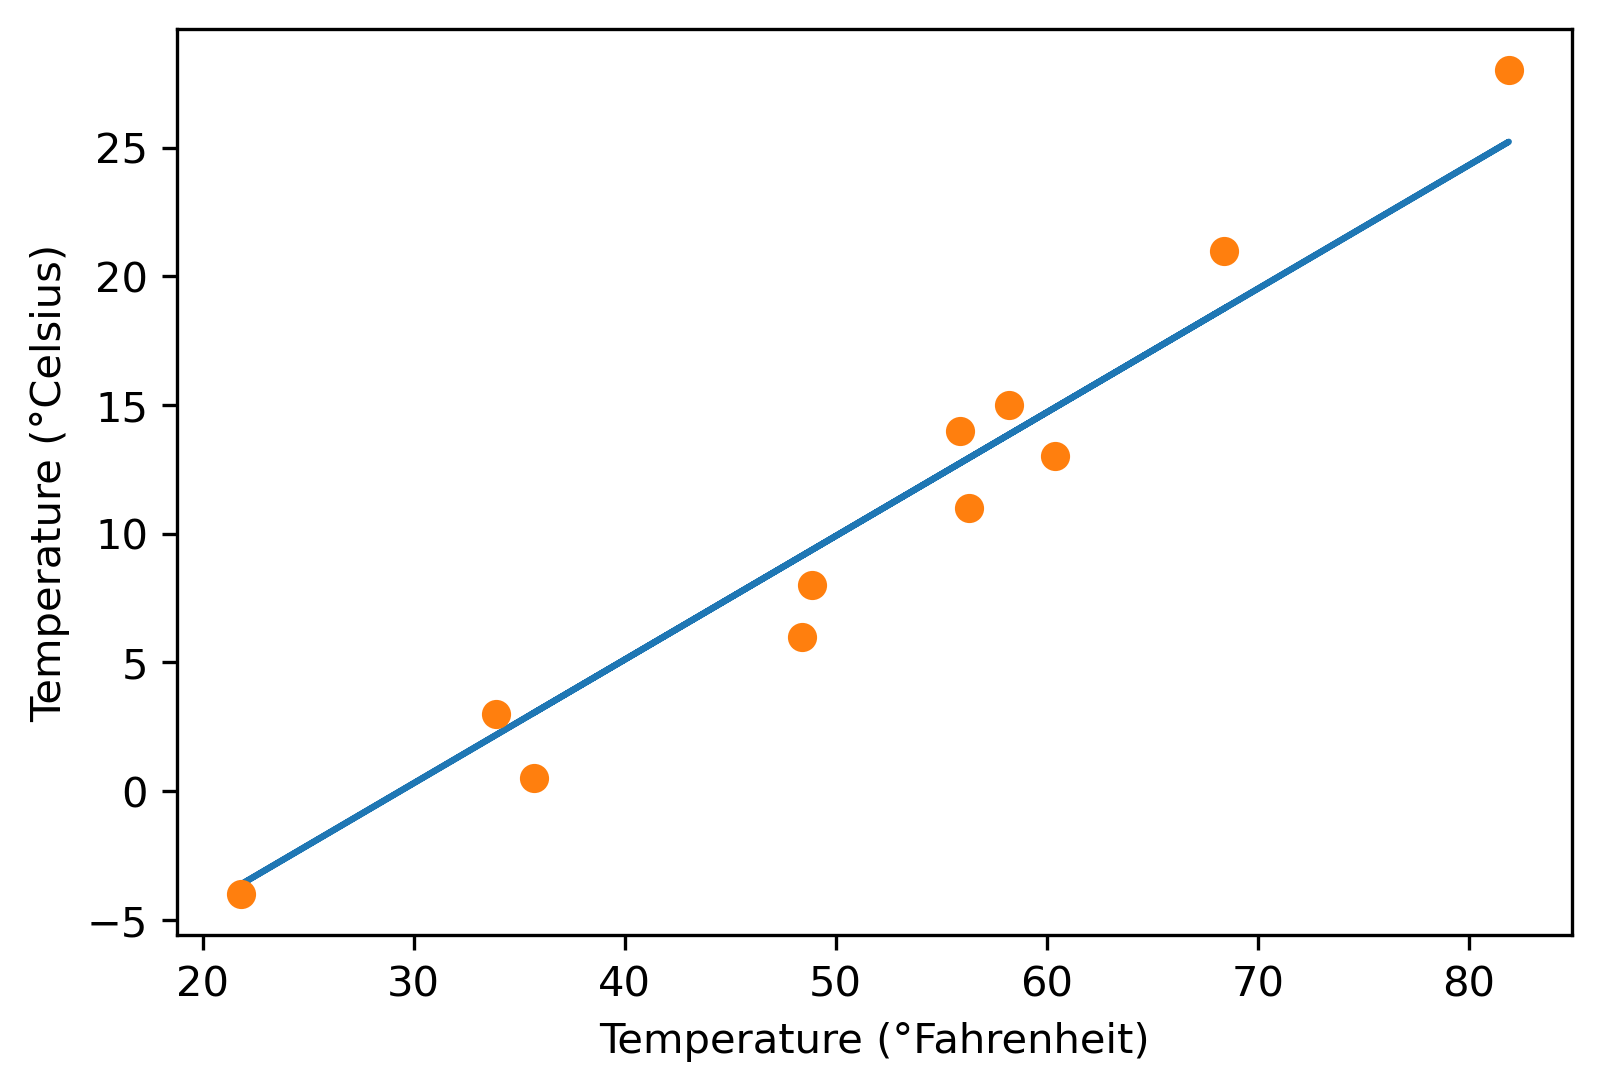

In [29]:

from matplotlib import pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')